In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [17]:
train_data = pd.read_csv('plagiarism_data/train.csv', names=['class', 'c_2', 'c_3','c_4','c_5', 'lcs_word'], index_col=False)
test_data = pd.read_csv('plagiarism_data/test.csv', names=['class', 'c_2', 'c_3','c_4','c_5', 'lcs_word'], index_col=False)

In [18]:
train_data['class'] = train_data['class'].astype('category')
test_data['class'] = test_data['class'].astype('category')
train_data.head()

,class,c_2,c_3,c_4,c_5,lcs_word
0,0,0.079070,0.009346,0.000000,0.000000,0.191781
1,1,0.719457,0.613636,0.515982,0.449541,0.846491
2,1,0.268817,0.156757,0.108696,0.081967,0.316062
3,0,0.115789,0.031746,0.005319,0.000000,0.242574
4,0,0.053846,0.007722,0.003876,0.000000,0.161172


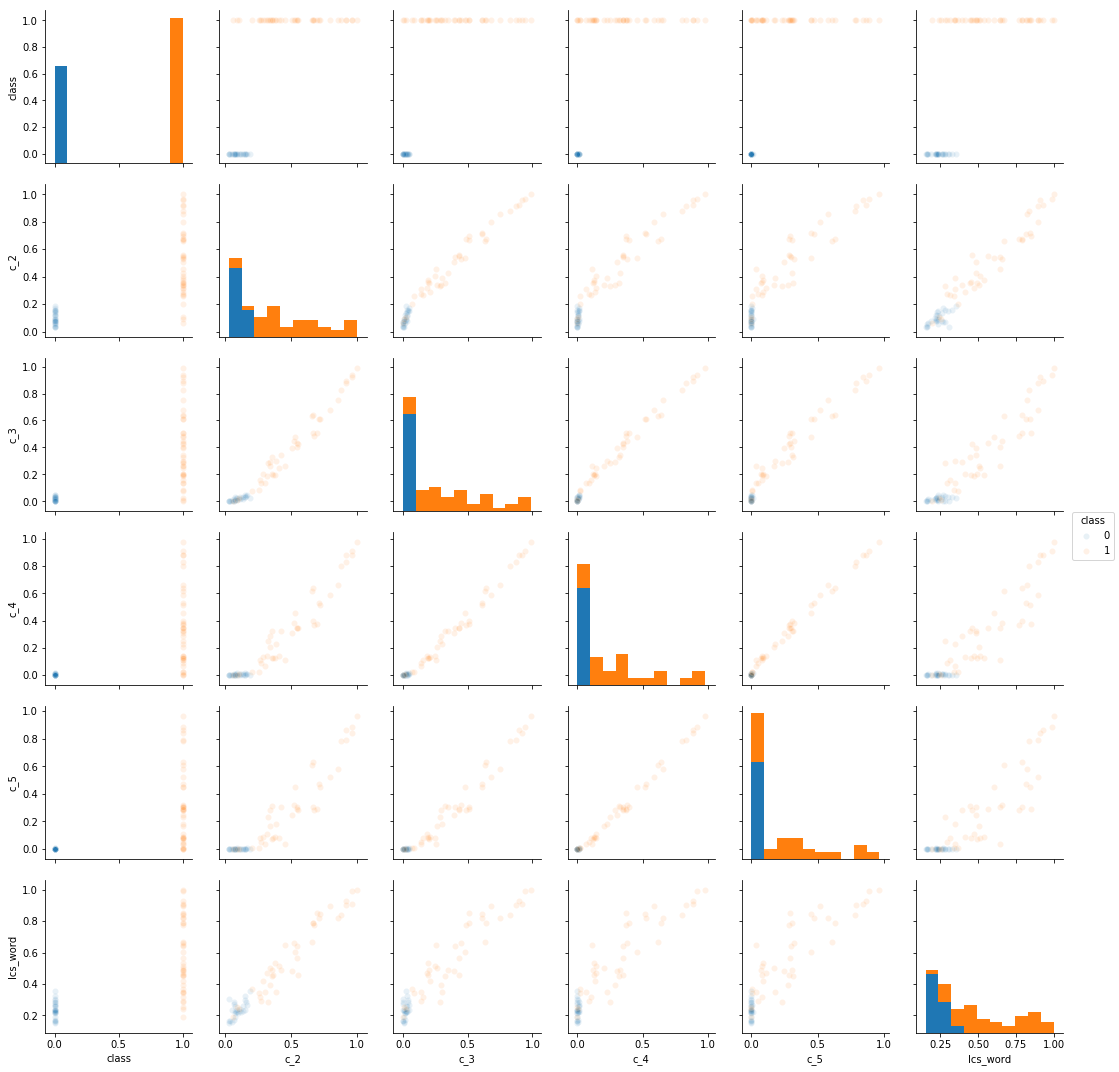

In [19]:
sns.pairplot(train_data, hue='class', plot_kws={'alpha':0.1})

In [20]:
train_X = train_data.drop('class', axis=1)
train_y = train_data['class']
trainXY = [train_X, train_y]

test_X = test_data.drop('class', axis=1)
test_y = test_data['class']
testXY = [test_X, test_y]

In [31]:
def report(model):
    print(classification_report(train_y, model.predict(train_X)))
    print(classification_report(test_y, model.predict(test_X)))

In [32]:
from sklearn.svm import SVC
svc = SVC(gamma='scale')
svc.fit(*trainXY)
report(svc)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.88      0.94        42

    accuracy                           0.93        70
   macro avg       0.92      0.94      0.93        70
weighted avg       0.94      0.93      0.93        70

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.93      0.97        15

    accuracy                           0.96        25
   macro avg       0.95      0.97      0.96        25
weighted avg       0.96      0.96      0.96        25



In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(*trainXY)
report(tree)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.93      0.96        42

    accuracy                           0.96        70
   macro avg       0.95      0.96      0.96        70
weighted avg       0.96      0.96      0.96        70

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.94        15

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25



[Text(200.88000000000002, 181.2, 'c_3 <= 0.06\ngini = 0.48\nsamples = 70\nvalue = [28, 42]'),
 Text(133.92000000000002, 108.72, 'c_2 <= 0.111\ngini = 0.175\nsamples = 31\nvalue = [28, 3]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.255\nsamples = 20\nvalue = [17, 3]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]')]

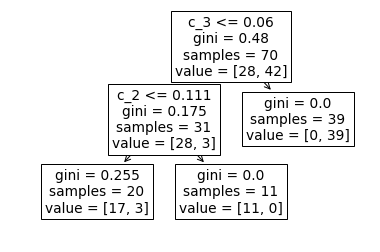

In [24]:
tree.decision_path(train_X.iloc[0:1]).todense()
plot_tree(tree, feature_names=train_data.columns[1:])

In [36]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(*trainXY)
report(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        42

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.88      1.00      0.94        15

    accuracy                           0.92        25
   macro avg       0.94      0.90      0.91        25
weighted avg       0.93      0.92      0.92        25



In [38]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(*trainXY)
report(lm)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        28
           1       1.00      0.88      0.94        42

    accuracy                           0.93        70
   macro avg       0.92      0.94      0.93        70
weighted avg       0.94      0.93      0.93        70

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        15

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



/home/ec2-user/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
